<a href="https://colab.research.google.com/github/Richa0416/research_agri/blob/main/research_agri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/Smart_Farming_Crop_Yield_2024.csv")
data.head()


,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [ ]:
data.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [ ]:
data.isnull().sum()


,0
farm_id,0
region,0
crop_type,0
soil_moisture_%,0
soil_pH,0
temperature_C,0
rainfall_mm,0
humidity_%,0
sunlight_hours,0
irrigation_type,150


In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')


In [ ]:
data.isnull().sum()


,0
farm_id,0
region,0
crop_type,0
soil_moisture_%,0
soil_pH,0
temperature_C,0
rainfall_mm,0
humidity_%,0
sunlight_hours,0
irrigation_type,0


In [ ]:
data.select_dtypes(include=['object']).columns


Index(['farm_id', 'region', 'crop_type', 'irrigation_type', 'fertilizer_type',
       'sowing_date', 'harvest_date', 'sensor_id', 'timestamp',
       'crop_disease_status'],
      dtype='object')

In [ ]:
data.drop(['farm_id', 'sensor_id'], axis=1, inplace=True)


In [ ]:
data['sowing_date'] = pd.to_datetime(data['sowing_date'])
data['harvest_date'] = pd.to_datetime(data['harvest_date'])


In [ ]:
data['crop_duration_days'] = (data['harvest_date'] - data['sowing_date']).dt.days


In [ ]:
data.drop(['sowing_date', 'harvest_date'], axis=1, inplace=True)


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [ ]:
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour


In [ ]:
data.drop('timestamp', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                500 non-null    int64  
 1   crop_type             500 non-null    int64  
 2   soil_moisture_%       500 non-null    float64
 3   soil_pH               500 non-null    float64
 4   temperature_C         500 non-null    float64
 5   rainfall_mm           500 non-null    float64
 6   humidity_%            500 non-null    float64
 7   sunlight_hours        500 non-null    float64
 8   irrigation_type       500 non-null    int64  
 9   fertilizer_type       500 non-null    int64  
 10  pesticide_usage_ml    500 non-null    float64
 11  total_days            500 non-null    int64  
 12  yield_kg_per_hectare  500 non-null    float64
 13  latitude              500 non-null    float64
 14  longitude             500 non-null    float64
 15  NDVI_index            5

In [ ]:
data.head()


,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,fertilizer_type,...,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index,crop_disease_status,crop_duration_days,month,day,hour
0,2,4,35.95,5.99,17.79,75.62,77.03,7.27,3,2,...,122,4408.07,14.970941,82.997689,0.63,0,122,3,19,0
1,4,3,19.74,7.24,30.18,89.91,61.13,5.67,2,0,...,112,5389.98,16.613022,70.869009,0.58,3,112,4,21,0
2,4,4,29.32,7.16,27.37,265.43,68.87,8.23,0,1,...,144,2931.16,19.503156,79.068206,0.80,0,144,2,28,0
3,0,1,17.33,6.03,33.73,212.01,70.46,5.03,2,2,...,134,4227.80,31.071298,85.519998,0.44,3,134,5,14,0
4,0,0,19.37,5.92,33.86,269.09,55.73,7.93,3,1,...,105,4979.96,16.568540,81.691720,0.84,2,105,4,13,0


In [ ]:
data.columns


Index(['region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C',
       'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type',
       'fertilizer_type', 'pesticide_usage_ml', 'total_days',
       'yield_kg_per_hectare', 'latitude', 'longitude', 'NDVI_index',
       'crop_disease_status', 'crop_duration_days', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
X = data.drop('yield_kg_per_hectare', axis=1)
y = data['yield_kg_per_hectare']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1061.9488910135403
MSE: 1439676.6806189474
R2 Score: -0.04244225633095855


<Axes: >

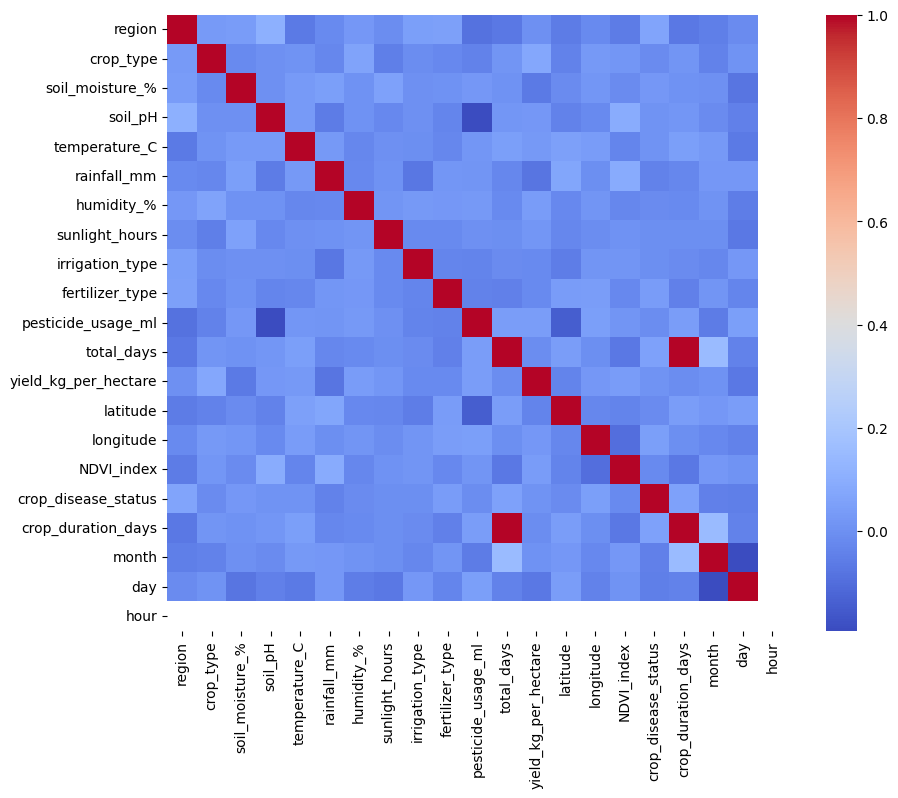

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm')


Text(0, 0.5, 'Predicted Yield')

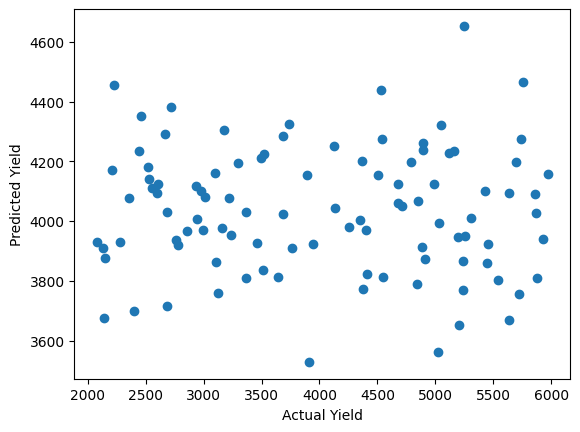

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -0.048521227213951024


In [ ]:
drop_cols = [
    'latitude', 'longitude', 'hour', 'day',
    'month', 'sensor_id', 'timestamp'
]

data_clean = data.drop(columns=drop_cols, errors='ignore')


In [ ]:
X = data_clean.drop('yield_kg_per_hectare', axis=1)
y = data_clean['yield_kg_per_hectare']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: -0.045750718565045645


In [ ]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10)


,0
pesticide_usage_ml,0.115757
soil_moisture_%,0.110693
rainfall_mm,0.105143
temperature_C,0.104184
humidity_%,0.096376
sunlight_hours,0.095785
NDVI_index,0.083581
soil_pH,0.081007
total_days,0.041597
crop_duration_days,0.041319


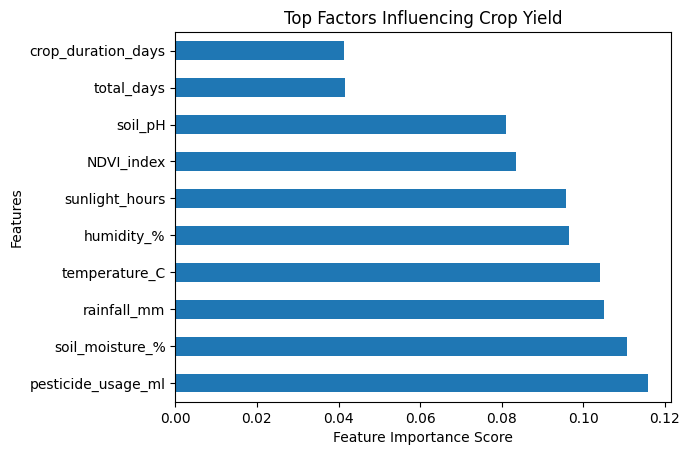

In [ ]:
import matplotlib.pyplot as plt

importance.head(10).plot(kind='barh')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Factors Influencing Crop Yield")
plt.show()


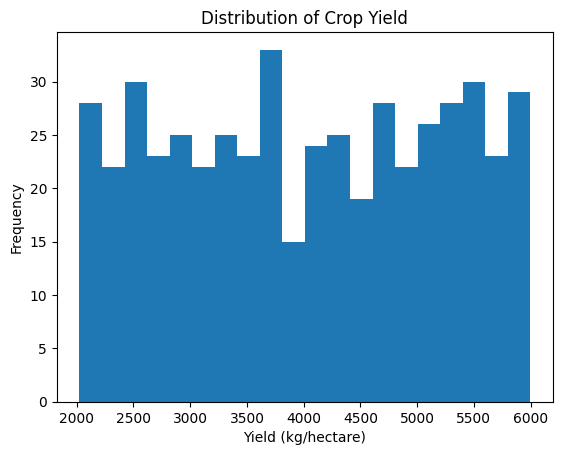

In [ ]:
plt.figure()
plt.hist(data['yield_kg_per_hectare'], bins=20)
plt.xlabel("Yield (kg/hectare)")
plt.ylabel("Frequency")
plt.title("Distribution of Crop Yield")
plt.show()


In [ ]:
data['yield_kg_per_hectare'].skew()
